In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import ParameterGrid, train_test_split
import seaborn as sns
from pickle import dump

In [2]:
total_data=pd.read_csv("../data/processed/final_data.csv")
total_data.head()

,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
0,2020-01-08,2230,0,0,36,0,0,0,0,0,0,34.0141,-118.2978,0,0,0
1,2020-01-01,330,1,0,25,1,1,1,1,1,1,34.0459,-118.2545,0,0,1
2,2020-01-01,1730,2,1,76,0,2,2,2,1,2,34.1685,-118.4019,0,0,2
3,2020-01-01,415,3,2,31,2,3,3,2,1,3,34.2198,-118.4468,0,0,3
4,2020-01-01,30,1,3,25,0,1,4,1,1,4,34.0452,-118.2534,0,0,4


In [3]:
killers=total_data[total_data['crm_cd_desc'].isin([66])]

In [4]:
killers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 2172 to 320390
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_occ      717 non-null    object 
 1   time_occ      717 non-null    int64  
 2   area_name     717 non-null    int64  
 3   crm_cd_desc   717 non-null    int64  
 4   vict_age      717 non-null    int64  
 5   vict_sex      717 non-null    int64  
 6   vict_descent  717 non-null    int64  
 7   premis_desc   717 non-null    int64  
 8   weapon_desc   717 non-null    int64  
 9   status_desc   717 non-null    int64  
 10  location      717 non-null    int64  
 11  lat           717 non-null    float64
 12  lon           717 non-null    float64
 13  weekday       717 non-null    int64  
 14  month         717 non-null    int64  
 15  mocodes_desc  717 non-null    int64  
dtypes: float64(2), int64(13), object(1)
memory usage: 95.2+ KB


In [5]:
killers=killers[['vict_age','vict_sex','vict_descent','area_name']]

In [6]:
X = killers
X_train, X_test = train_test_split(X, test_size=0.4, random_state=14)

In [7]:
# Save data

X_train.to_csv("../data/processed/killers_X_train.csv", index=False)

X_test.to_csv("../data/processed/killers_X_test.csv", index=False)

In [8]:
model = KMeans(n_clusters = 10,n_init="auto", random_state = 14)
model.fit(X_train)

KMeans(n_clusters=10, n_init='auto', random_state=14)

In [9]:
y_train = model.labels_

In [10]:
y_test = model.predict(X_test)

In [11]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred = knn_model.predict(X_train)

In [13]:
accuracy_score(y_train, y_pred)

0.9651162790697675

In [14]:
y_pred_test = knn_model.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred_test)

0.9581881533101045

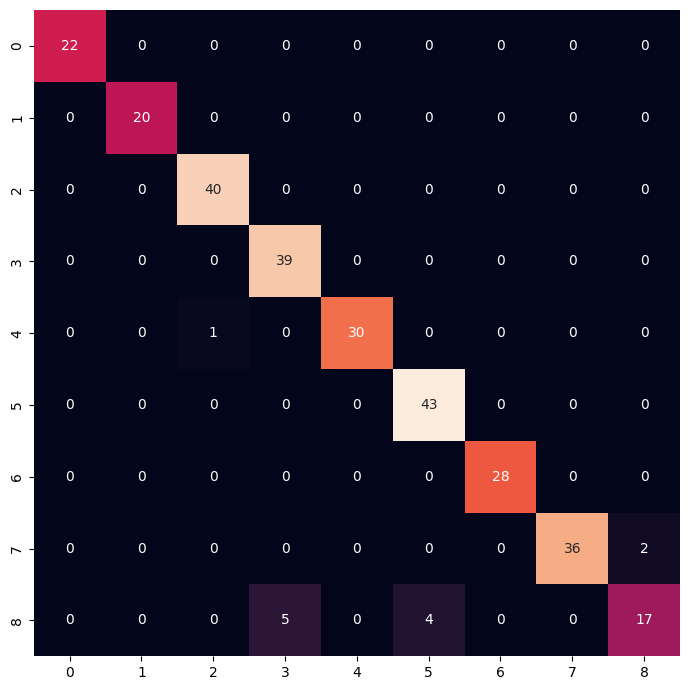

In [16]:
homicide_cm = confusion_matrix(y_test, y_pred_test)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(homicide_cm)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [17]:
best_accuracy = 0
best_combination = None

param_grid  = {
    "n_neighbors":[3,5,7],
    "weights": ["uniform","distance"],
    "algorithm": ["auto", "kd_tree", "brute"], 
    'metric':["euclidean","manhattan","cityblock","minkowski"]
    
}

for combination in ParameterGrid(param_grid):
    model = KNeighborsClassifier(**combination)
    print(model)
    model.fit(X_train, y_train)   
    y_pred = model.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    print("Combination:", combination)
    print("Accuracy:", acc)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_combination = combination
        
print("Best Combination:", best_combination)
print("Best Accuracy:", best_accuracy)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.9767441860465116
KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 1.0
KNeighborsClassifier(metric='euclidean')
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.9651162790697675
KNeighborsClassifier(metric='euclidean', weights='distance')
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 1.0
KNeighborsClassifier(metric='euclidean', n_neighbors=7)
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.9627906976744186
KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')
Combination: {'algorithm': 

In [18]:
best_combination

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 3,
 'weights': 'distance'}

In [19]:
best_model = KNeighborsClassifier(**best_combination)
best_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [20]:
y_pred = best_model.predict(X_train)

In [21]:
accuracy_score(y_train, y_pred)

1.0

In [22]:
y_pred_test = best_model.predict(X_test)

In [23]:
accuracy_score(y_test, y_pred_test)

0.9651567944250871

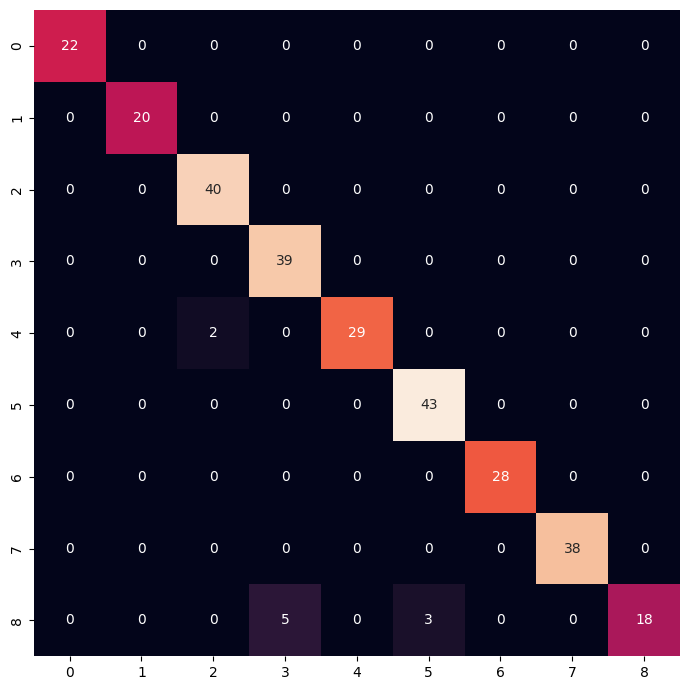

In [24]:

killers_cm = confusion_matrix(y_test, y_pred_test)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(killers_cm)

plt.figure(figsize = (7, 7))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

Conclusion:

Commencing the K-means model without normalizing the data to obtain our target (Aggressor Profiles), we observed a good distribution in the clusters. Consequently, we proceeded to implement a supervised KNN model to predict future events.

Following model optimization, we achieved a near to 1.0 accuracy, signifying a strong model performance. This suggests that there is no need to repeat the process with normalized data, as the accuracy is already optimal.

In [25]:
elementos_unicos, frecuencias = np.unique(y_pred_test, return_counts=True)

# Imprimir resultados
for elemento, frecuencia in zip(elementos_unicos, frecuencias):
    print(f"El elemento {elemento} se repite {frecuencia} veces en el array.")

El elemento 0 se repite 22 veces en el array.
El elemento 1 se repite 20 veces en el array.
El elemento 2 se repite 42 veces en el array.
El elemento 3 se repite 44 veces en el array.
El elemento 4 se repite 29 veces en el array.
El elemento 5 se repite 46 veces en el array.
El elemento 6 se repite 28 veces en el array.
El elemento 7 se repite 38 veces en el array.
El elemento 8 se repite 18 veces en el array.


In [26]:
dump(best_model, open("../models/best_model_killers.pk", "wb"))

In [27]:
dat1 = X_train
dat1["cluster"] = y_train
dat2 = X_test
dat2["cluster"] = y_test

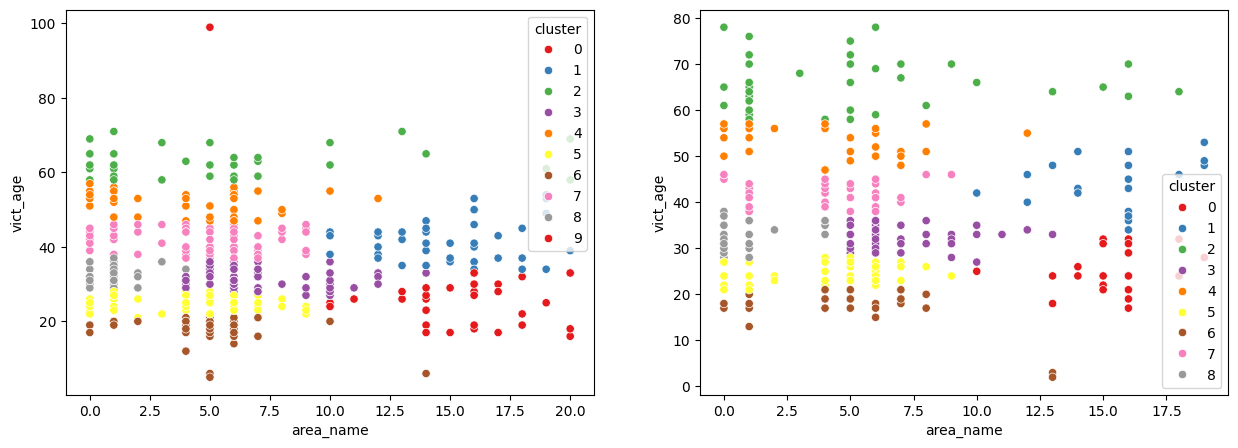

In [28]:
fig, axis = plt.subplots(1, 2, figsize = (15,5))

sns.scatterplot(ax = axis[0], data = dat1, x = 'area_name', y = 'vict_age', hue = 'cluster', palette='Set1')
sns.scatterplot(ax = axis[1], data = dat2, x = 'area_name', y = 'vict_age', hue = 'cluster', palette='Set1')

plt.show()